In [404]:
from fbprophet import Prophet
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [405]:
df = pd.read_csv("./household_power_consumption.txt", sep =";", parse_dates = {"date" : ["Date","Time"]}, infer_datetime_format=True, low_memory=False, na_values=["nan","?"], index_col = ["date"]).reset_index()
df.fillna(df.mean(),inplace=True)

In [406]:
df.head(5)

,date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [407]:
round(df.corr(method="pearson").T,2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.00,0.25,-0.40,1.00,0.48,0.43,0.64
Global_reactive_power,0.25,1.00,-0.11,0.27,0.12,0.14,0.09
Voltage,-0.40,-0.11,1.00,-0.41,-0.20,-0.17,-0.27
Global_intensity,1.00,0.27,-0.41,1.00,0.49,0.44,0.63
Sub_metering_1,0.48,0.12,-0.20,0.49,1.00,0.05,0.10
Sub_metering_2,0.43,0.14,-0.17,0.44,0.05,1.00,0.08
Sub_metering_3,0.64,0.09,-0.27,0.63,0.10,0.08,1.00


In [408]:
df.shape

(2075259, 8)

In [409]:
df.isna().sum()

date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   date                   datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [411]:
df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True)

In [412]:
df = df.set_index('date')

In [413]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [414]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Daily Upsampling

In [415]:
df_daily = df.resample("D").mean()

In [416]:
df_daily.shape

(1442, 7)

In [417]:
df_daily.corr().T

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.036001,0.111562,0.999182,0.537367,0.477530,0.733220
Global_reactive_power,0.036001,1.000000,-0.059897,0.057564,0.318835,0.181222,0.031286
Voltage,0.111562,-0.059897,1.000000,0.085787,-0.073601,-0.080416,0.168036
Global_intensity,0.999182,0.057564,0.085787,1.000000,0.549419,0.486557,0.724682
Sub_metering_1,0.537367,0.318835,-0.073601,0.549419,1.000000,0.251086,0.305883
Sub_metering_2,0.477530,0.181222,-0.080416,0.486557,0.251086,1.000000,0.197472
Sub_metering_3,0.733220,0.031286,0.168036,0.724682,0.305883,0.197472,1.000000


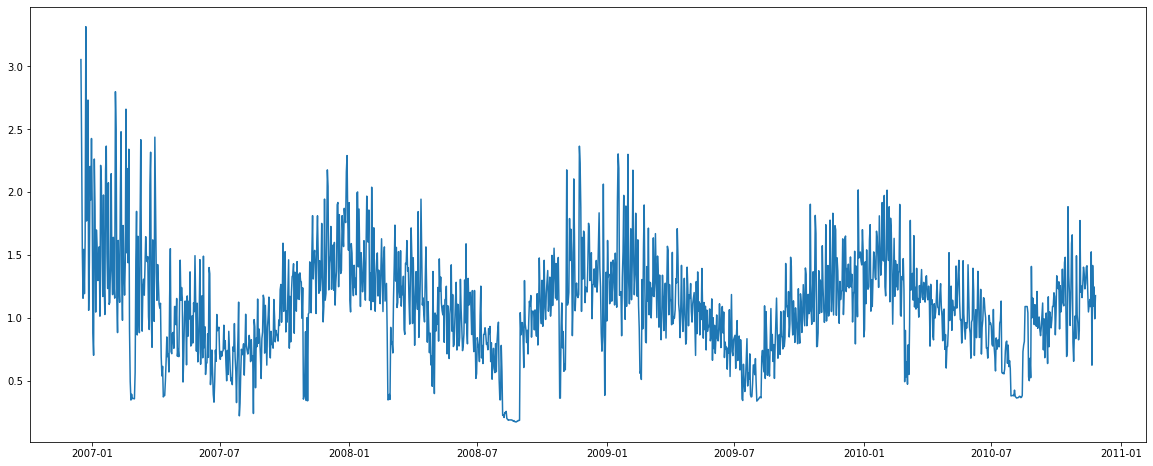

In [418]:
plt.plot(df_daily["Global_active_power"])

In [419]:
df_daily.reset_index()

,date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...,...
1437,2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889
1438,2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417
1439,2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889
1440,2010-11-25,0.993864,0.080644,241.536257,4.169444,0.747222,0.295833,3.522222


In [420]:
df_daily.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [421]:
df_daily.reset_index(inplace=True)

In [422]:
df_daily.dtypes

date                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [423]:
mapping = {'date':'ds','Global_active_power':'y', 'Global_reactive_power':'A', 'Voltage':'B',
       'Global_intensity':'C','Sub_metering_1':'D', 'Sub_metering_2':'E',
       'Sub_metering_3':'F'}
df_daily = df_daily.rename(mapping, axis=1)

In [424]:
df_daily.head()

,ds,y,A,B,C,D,E,F
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [425]:
df_daily.isna().sum()

ds    0
y     0
A     0
B     0
C     0
D     0
E     0
F     0
dtype: int64

In [426]:
model = Prophet()

In [427]:
model.add_regressor('A')
model.add_regressor('B')
model.add_regressor('C')
model.add_regressor('D')
model.add_regressor('E')
model.add_regressor('F')

In [428]:
#train = df_daily.iloc[0:]
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(df_daily, test_size=0.25, random_state=10)
train = df_daily.iloc[:1442-365,:]
test = df_daily.iloc[1442-365:,:]

In [429]:
#future = model.make_future_dataframe(periods=10, freq="D")
#forecast = model.predict(future)
#forecast.head()
train

,ds,y,A,B,C,D,E,F
0,2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
1,2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2,2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
3,2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
4,2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...,...
1072,2009-11-22,1.702067,0.154610,241.077701,7.193194,4.704167,0.285417,11.178472
1073,2009-11-23,1.021613,0.103012,242.742715,4.236667,0.000000,0.279167,5.715278
1074,2009-11-24,1.478372,0.106819,241.976528,6.179861,1.729861,3.179861,6.309722
1075,2009-11-25,1.375090,0.121858,241.178785,5.770278,0.517361,3.529861,7.358333


In [430]:
train.columns

Index(['ds', 'y', 'A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [431]:
print(train.shape)
print(test.shape)

(1077, 8)
(365, 8)


In [432]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [433]:
future = model.predict(test)

In [434]:
future.shape

(365, 40)

In [435]:
future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,A,A_lower,A_upper,B,B_lower,B_upper,C,C_lower,C_upper,D,D_lower,D_upper,E,E_lower,E_upper,F,F_lower,F_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1.108980,0.947308,0.968676,1.108980,1.108980,0.005664,0.005664,0.005664,0.004629,0.004629,0.004629,-0.163866,-0.163866,-0.163866,0.001072,0.001072,0.001072,0.000505,0.000505,0.000505,0.002849,0.002849,0.002849,-0.150761,-0.150761,-0.150761,-0.149148,-0.149148,-0.149148,0.000118,0.000118,0.000118,-0.001732,-0.001732,-0.001732,0.0,0.0,0.0,0.958219
1,2009-11-28,1.109073,1.281047,1.301926,1.109073,1.109073,-0.006649,-0.006649,-0.006649,0.003710,0.003710,0.003710,0.181297,0.181297,0.181297,-0.000987,-0.000987,-0.000987,0.000508,0.000508,0.000508,0.005726,0.005726,0.005726,0.182665,0.182665,0.182665,0.183604,0.183604,0.183604,0.000797,0.000797,0.000797,-0.001736,-0.001736,-0.001736,0.0,0.0,0.0,1.291738
2,2009-11-29,1.109166,1.133458,1.155778,1.109166,1.109166,-0.002085,-0.002085,-0.002085,0.009708,0.009708,0.009708,0.030943,0.030943,0.030943,0.000381,0.000381,0.000381,-0.000355,-0.000355,-0.000355,-0.001096,-0.001096,-0.001096,0.035314,0.035314,0.035314,0.037497,0.037497,0.037497,-0.000461,-0.000461,-0.000461,-0.001722,-0.001722,-0.001722,0.0,0.0,0.0,1.144480
3,2009-11-30,1.109259,1.204969,1.225137,1.109259,1.109259,0.002948,0.002948,0.002948,0.011304,0.011304,0.011304,0.089632,0.089632,0.089632,0.000377,0.000377,0.000377,0.000516,0.000516,0.000516,0.003309,0.003309,0.003309,0.106174,0.106174,0.106174,0.108085,0.108085,0.108085,-0.000229,-0.000229,-0.000229,-0.001682,-0.001682,-0.001682,0.0,0.0,0.0,1.215433
4,2009-12-01,1.109351,1.214700,1.235738,1.109351,1.109351,0.004485,0.004485,0.004485,0.007341,0.007341,0.007341,0.103002,0.103002,0.103002,0.001072,0.001072,0.001072,0.000519,0.000519,0.000519,0.002035,0.002035,0.002035,0.115938,0.115938,0.115938,0.118454,0.118454,0.118454,-0.000906,-0.000906,-0.000906,-0.001610,-0.001610,-0.001610,0.0,0.0,0.0,1.225289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2010-11-22,1.142382,1.355226,1.596612,1.027363,1.270550,0.004421,0.004421,0.004421,-0.001192,-0.001192,-0.001192,0.326542,0.326542,0.326542,-0.002054,-0.002054,-0.002054,-0.000048,-0.000048,-0.000048,0.001318,0.001318,0.001318,0.327069,0.327069,0.327069,0.328987,0.328987,0.328987,-0.000229,-0.000229,-0.000229,-0.001688,-0.001688,-0.001688,0.0,0.0,0.0,1.469452
361,2010-11-23,1.142475,1.034236,1.280153,1.026819,1.271086,0.005076,0.005076,0.005076,0.000133,0.000133,0.000133,0.006526,0.006526,0.006526,-0.000132,-0.000132,-0.000132,0.000485,0.000485,0.000485,-0.001323,-0.001323,-0.001323,0.008185,0.008185,0.008185,0.010765,0.010765,0.010765,-0.000906,-0.000906,-0.000906,-0.001675,-0.001675,-0.001675,0.0,0.0,0.0,1.150660
362,2010-11-24,1.142568,1.175028,1.423846,1.026264,1.271616,0.005743,0.005743,0.005743,-0.001774,-0.001774,-0.001774,0.143908,0.143908,0.143908,0.000367,0.000367,0.000367,-0.000286,-0.000286,-0.000286,0.003502,0.003502,0.003502,0.150323,0.150323,0.150323,0.151459,0.151459,0.151459,0.000542,0.000542,0.000542,-0.001678,-0.001678,-0.001678,0.0,0.0,0.0,1.292890
363,2010-11-25,1.142661,0.918200,1.166506,1.025708,1.272136,0.007925,0.007925,0.007925,0.003499,0.003499,0.003499,-0.114102,-0.114102,-0.114102,0.000380,0.000380,0.000380,0.000495,0.000495,0.000495,-0.003978,-0.003978,-0.003978,-0.107335,-0.107335,-0.107335,-0.105782,-0.105782,-0.105782,0.000139,0.000139,0.000139,-0.001692,-0.001692,-0.001692,0.0,0.0,0.0,1.035325


In [436]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_percentage_error as MAPE

In [437]:
Y = np.array(test["y"])
Y_pred = np.array(future["yhat"])
mape = np.mean(np.abs((Y - Y_pred) / Y)) * 100
round(mape,4)

2.9813

In [438]:
#rmse = np.sqrt(MSE(Y,Y_pred)) 
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
rmse

0.02980732792028054

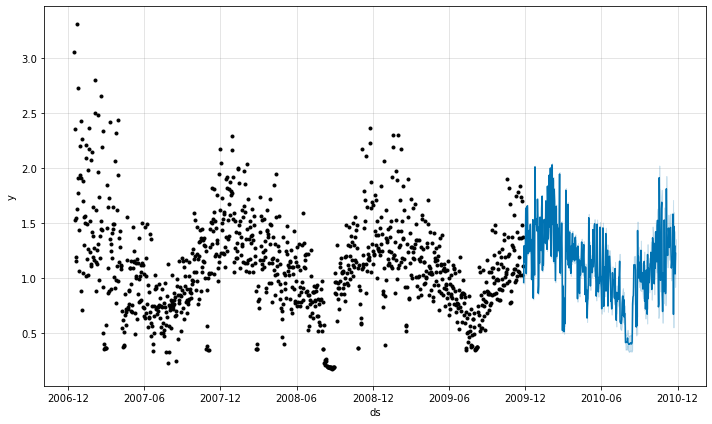

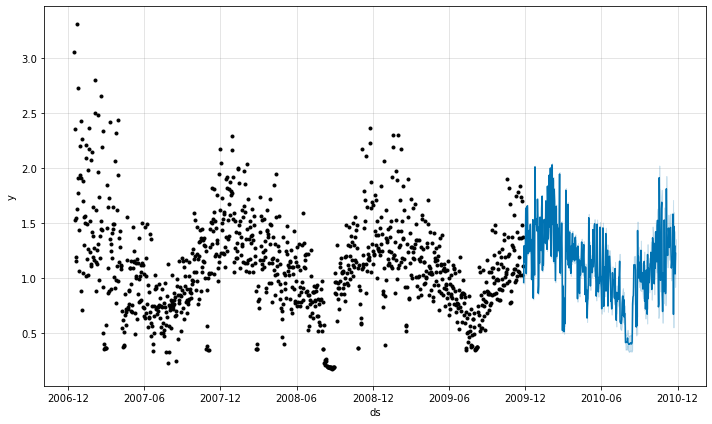

In [439]:
rcParams["figure.figsize"] = (20,8)
model.plot(future)

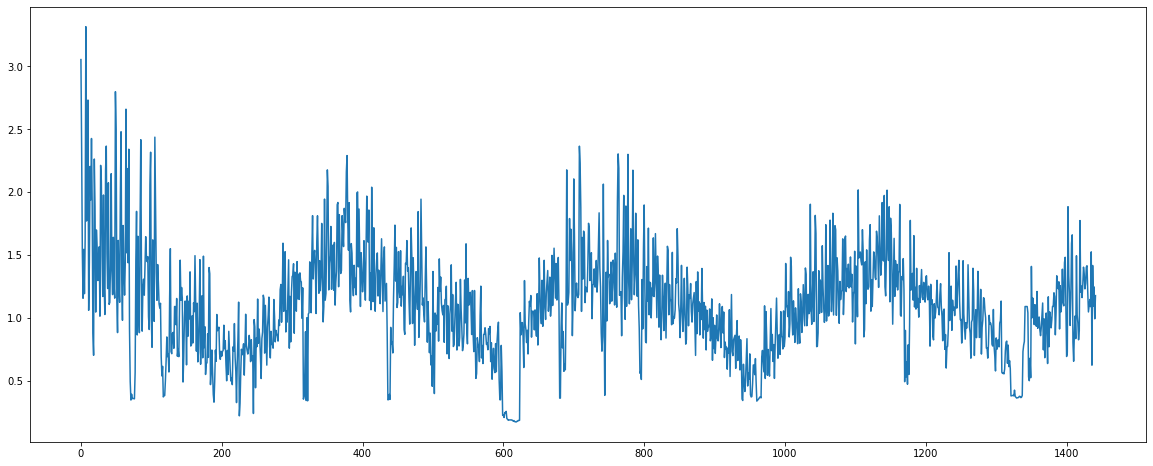

In [440]:
rcParams["figure.figsize"] = (20,8)
plt.plot(df_daily["y"])

ValueError: Regressor 'A' missing from dataframe

In [ ]:
new_df = df_daily[["ds","y"]]
new_df

In [ ]:
new_train = df_daily.iloc[:1442-365,:]
new_test = df_daily.iloc[1442-365:,:]

In [ ]:
models = Prophet()

In [ ]:
models.fit(new_train)

In [ ]:
future_1 = models.predict(new_test)
future_1

In [ ]:
Y = np.array(new_test["y"])
Y_pred = np.array(future_1["yhat"])
mape1 = MAPE(Y, Y_pred)

mape1

In [ ]:
rmse1 = np.sqrt(MSE(Y,Y_pred)) 
rmse1

In [ ]:
rcParams["figure.figsize"] = (20,8)
model.plot(future_1.head(10))

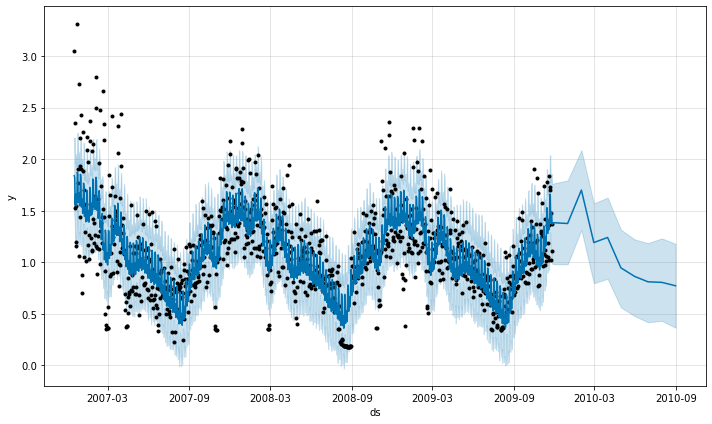

In [446]:
fut = models.make_future_dataframe(periods= 10 , freq= 'M' ) 
forecast = models.predict(fut) 
forecast.head()
rcParams["figure.figsize"] = (30,10)
model.plot(forecast)
plt.show()

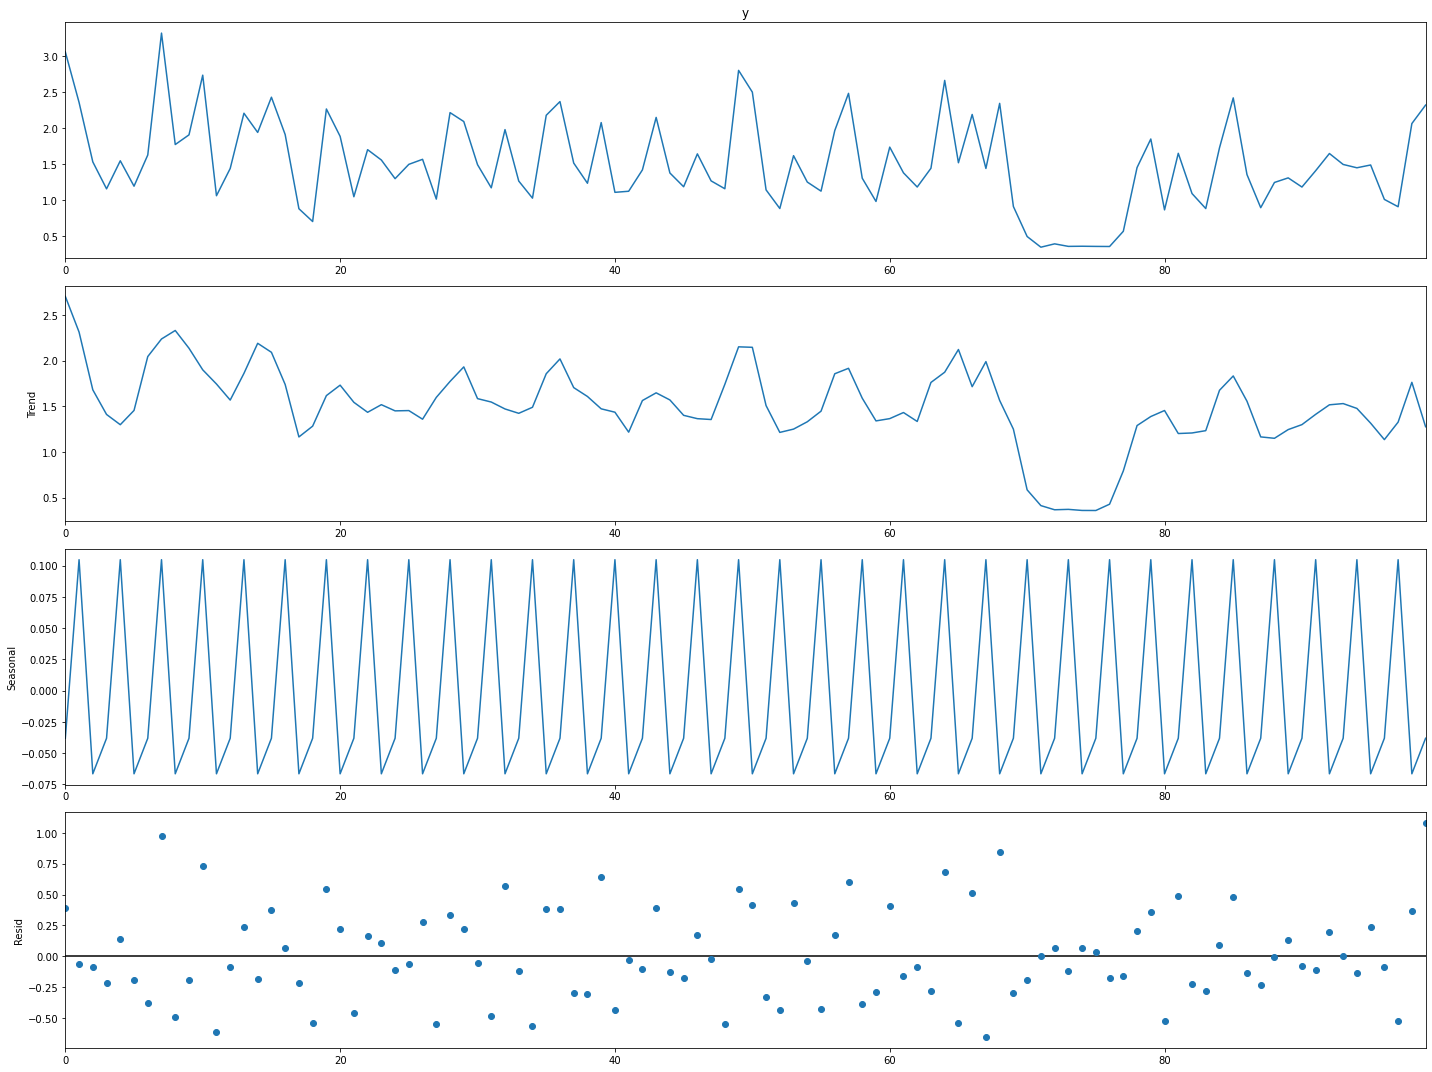

In [449]:
import statsmodels.api as sm
from pylab import rcParams
rcParams["figure.figsize"] = (20,15)
decompose_series = sm.tsa.seasonal_decompose(df_daily["y"].head(100), model="additive",extrapolate_trend='freq', period=3)
decompose_series.plot()
plt.show()